In [11]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\olive\OneDrive\Documents\University\University Work\Y3S1\Dissertation\Data\pound-dollar-exchange-rate-historical-chart.csv"

# Load the CSV with error handling
try:
    df = pd.read_csv(file_path, on_bad_lines='skip')  # Skip malformed lines
    print("File loaded successfully!")
    print(df.head())  # Preview the first few rows
except Exception as e:
    print("Error loading file:", e)


File loaded successfully!
                           Macrotrends Data Download
0  Pound Dollar Exchange Rate (GBP USD) - Histori...
1  DISCLAIMER AND TERMS OF USE: HISTORICAL DATA I...
2  FOR INFORMATIONAL PURPOSES - NOT FOR TRADING P...
3  NEITHER MACROTRENDS LLC NOR ANY OF OUR INFORMA...
4  FOR ANY DAMAGES RELATING TO YOUR USE OF THE DA...


In [12]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\olive\OneDrive\Documents\University\University Work\Y3S1\Dissertation\Data\pound-dollar-exchange-rate-historical-chart.csv"

# Load the CSV, skipping metadata
df = pd.read_csv(file_path, skiprows=10, on_bad_lines='skip')  # Adjust `skiprows` based on where the data starts

# Preview the first few rows to ensure it's clean
print("Data preview after skipping metadata:\n", df.head())


Data preview after skipping metadata:
   ATTRIBUTION: Proper attribution requires clear indication of the data source as "www.macrotrends.net".
0  A "dofollow" backlink to the originating page ...                                                    


In [13]:
# Rename columns (adjust as needed based on the preview)
df.columns 

Index(['ATTRIBUTION: Proper attribution requires clear indication of the data source as "www.macrotrends.net".'], dtype='object')

In [14]:
with open(file_path, 'r') as file:
    lines = file.readlines()
    for i, line in enumerate(lines[:20]):  # Print the first 20 lines
        print(f"Line {i}: {line.strip()}")


Line 0: Macrotrends Data Download
Line 1: 
Line 2: Pound Dollar Exchange Rate (GBP USD) - Historical Chart
Line 3: 
Line 4: DISCLAIMER AND TERMS OF USE: HISTORICAL DATA IS PROVIDED "AS IS" AND SOLELY
Line 5: FOR INFORMATIONAL PURPOSES - NOT FOR TRADING PURPOSES OR ADVICE.
Line 6: NEITHER MACROTRENDS LLC NOR ANY OF OUR INFORMATION PROVIDERS WILL BE LIABLE
Line 7: FOR ANY DAMAGES RELATING TO YOUR USE OF THE DATA PROVIDED.
Line 8: 
Line 9: 
Line 10: 
Line 11: ATTRIBUTION: Proper attribution requires clear indication of the data source as "www.macrotrends.net".
Line 12: A "dofollow" backlink to the originating page is also required if the data is displayed on a web page.
Line 13: 
Line 14: 
Line 15: date, value
Line 16: 1971-01-04,2.3900
Line 17: 1971-01-05,2.3900
Line 18: 1971-01-06,2.4000
Line 19: 1971-01-07,2.4000


In [15]:
df = pd.read_csv(file_path, skiprows=15, on_bad_lines='skip')


In [16]:
df.columns  # Adjust based on the actual content


Index(['date', ' value'], dtype='object')

In [17]:
df.columns = ['Date', 'Value']

In [18]:
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert date to datetime

# Filter for dates from 2000 onwards
df = df[df['Date'] >= '2000-01-01']

# Preview the filtered data
print("Filtered Data:\n", df.head())

#Save the cleaned and filtered data
# filtered_file_path = r"C:\Users\olive\OneDrive\Documents\University\University Work\Y3S1\Dissertation\Data\filtered_gbp_usd.csv"
# df.to_csv(filtered_file_path, index=False)
# print(f"Filtered data saved to: {filtered_file_path}") """


Filtered Data:
            Date  Value
7273 2000-01-03   1.63
7274 2000-01-04   1.64
7275 2000-01-05   1.64
7276 2000-01-06   1.65
7277 2000-01-07   1.64


In [19]:
print(df.columns)


Index(['Date', 'Value'], dtype='object')


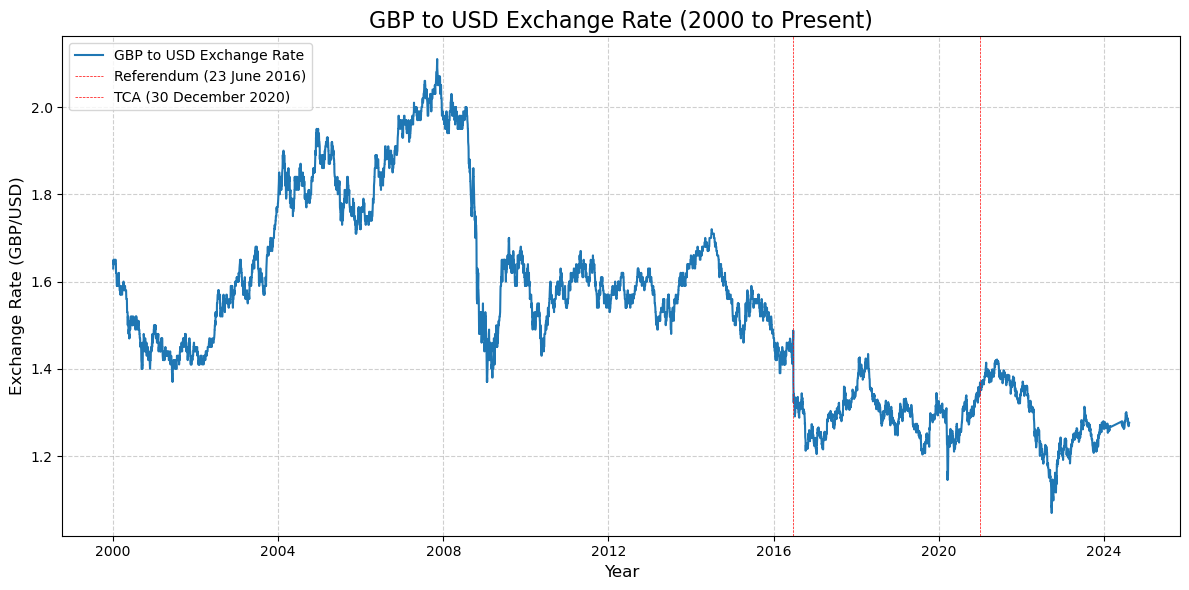

In [20]:
# Import matplotlib explicitly
import matplotlib.pyplot as plt

brexit_date = pd.to_datetime("2016-06-23")
tca_date = pd.to_datetime("2020-12-30")
# Re-plot the data after ensuring all required imports are included
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='GBP to USD Exchange Rate', linewidth=1.5)
plt.axvline(x=brexit_date, color='red', linestyle='--', linewidth=0.5, label='Referendum (23 June 2016)')
plt.axvline(x=tca_date, color='red', linestyle='--', linewidth=0.5, label='TCA (30 December 2020)')
plt.title("GBP to USD Exchange Rate (2000 to Present)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Exchange Rate (GBP/USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
